# DNN (Deep Neural Network)
## 1차 연립방정식을 이용한 데이터 학습
h = wx + b (기본 가정)  
(x, y) = (1,2), (2,4.4), (3.64)  

* 평균제곱근오차(RMSE)  
* 역행렬을 이용하여 최적해 구하기  


In [5]:
import numpy as np
import numpy.linalg as lin

In [3]:
a = np.array([[1,1],[2,1]])
print(a.shape)

(2, 2)


In [6]:
a_ = lin.inv(a)
print(a_)

[[-1.  1.]
 [ 2. -1.]]


In [12]:
y = np.array([2,4.4])
print(y)
print(y.shape)   #1차원 벡터

[2.  4.4]
(2,)


In [9]:
w = a_ * y   #scalar multiple
print(w)

[[-2.   4.4]
 [ 4.  -4.4]]


* y는 행렬 아니고 1차원 벡터(rank)임. 사실 이렇게 쓰면 tensorflow에서 오류나

In [10]:
w = np.matmul(a_, y)    #vector multiple
print(w)

[ 2.4 -0.4]


In [14]:
y_1=np.array([[2,4.4]])    #vector 임. 그런데 1x2
print(y_1.shape)

(1, 2)


In [17]:
y_2 = np.array([[2],[4]])    #col vec 수동으로
print(y_2.shape)

(2, 1)


In [19]:
y_3=np.array([[2,4.4]]).reshape(2,1)    #2x1로 변환
print(y_3.shape)

(2, 1)


In [21]:
y=np.array([[2,4.4]]).transpose()    #2x1로 변환
print(y.shape)

(2, 1)


In [23]:
w=np.matmul(a_,y)
print(w)
print(w.shape)

[[ 2.4]
 [-0.4]]
(2, 1)


In [ ]:
#2
a = np.array([[2,2,0],[-2,1,1]])
lin.inv(a)

a = np.array(([1,2],[2,4],[3,6.4]))
print(np.linalg.pinv(a))

In [24]:
a = np.array([[1,1],[2,1],[3,1]])
a_ = lin.inv(a)    #정방행렬이 아니라 역행렬 못 구함

LinAlgError: Last 2 dimensions of the array must be square

In [26]:
a = np.array([[1,1],[2,1],[3,1]])
a_ = lin.pinv(a)    #슈도역행렬
print(a_)
print(a_.shape)

[[-5.00000000e-01 -3.19189120e-16  5.00000000e-01]
 [ 1.33333333e+00  3.33333333e-01 -6.66666667e-01]]
(2, 3)


In [27]:
y=np.array([2,4.4,6.4]).reshape(3,1)
w=np.matmul(a_,y)
print(w)
print(w.shape)

[[ 2.2       ]
 [-0.13333333]]
(2, 1)


In [28]:
# y = wx + b
x=1
y=w[0,0]*x+w[1,0]    #예측값
print(y)

2.066666666666666


In [36]:
y = np.matmul(w,np.array([[1,1]]))
print(y[0,0])

2.2000000000000006


In [48]:
#내실습

x = np.array([[1,2,3,4,5,6,7,8,9,10]]).transpose()
y = np.matmul(w,x)
print(y)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 1)

In [49]:
x_ = np.array([[-1,1],[0,1],[1,1],[2,1]])    #bias때문에 항상 1을 넣어야 해
np.matmul(x_,w)

array([[-2.33333333],
       [-0.13333333],
       [ 2.06666667],
       [ 4.26666667]])

## Keras 기본
### XOR

In [15]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU

In [16]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [9]:
#선형 신경망. 신경망 하나만 사용.
#입력은 2개(input_dimension), 출력은 하나
# -> 변수 3개 (w1, w2, b)
model = Sequential()
model.add(Dense(1, input_dim=2))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = Sequential()

model.add(Dense(5, input_dim=2))    #입력층 5*2+5=15개 (학습 파라미터 수)
model.add(Activation('sigmoid'))

model.add(Dense(1))                 #출력층 
model.add(Activation('sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 15        
_________________________________________________________________
activation_3 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [17]:
model.fit(X,y,batch_size=4, epochs=2000, verbose=0)
print(model.predict_proba(X))  #4x1 matrix. sample 수 * 클래스수이미르?

[[0.09346411]
 [0.90573645]
 [0.9078003 ]
 [0.09521601]]


In [19]:
p = model.predict(X)
print(p > 0.5)
print((p > 0.5)*1)    #binary로 표현

[[False]
 [ True]
 [ True]
 [False]]
[[0]
 [1]
 [1]
 [0]]


In [23]:
model = Sequential()

model.add(Dense(2, input_dim=2))
model.add(Activation('sigmoid'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X,y,batch_size=4, epochs=3000, verbose=0)
print(model.predict_proba(X))

[[0.4696138 ]
 [0.3877161 ]
 [0.72873986]
 [0.43537456]]


### 그래프 그리기

(2500, 2)
<class 'numpy.ndarray'>
(2500, 1)


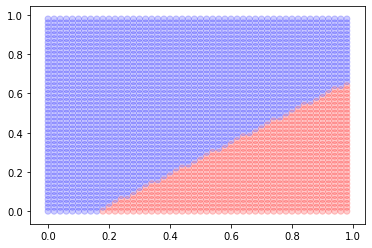

In [24]:
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 5)                 15        
_________________________________________________________________
activation_13 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
_________________________________________________________________
activation_14 (Activation)   (None, 1)                 0         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
[[0.08700377]
 [0.82210815]
 [0.88800526]
 [0.16296518]]
(2500, 2)
<class 'numpy.ndarray'>
(2500, 1)


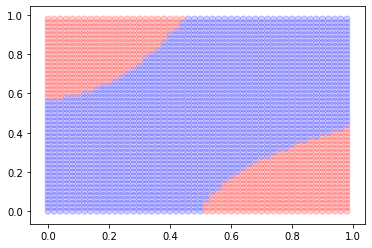

In [25]:
#입력층 5단계로
model = Sequential()

model.add(Dense(5, input_dim=2))    #입력층
model.add(Activation('sigmoid'))

model.add(Dense(1))                 #출력층 
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X,y,batch_size=4, epochs=3000, verbose=0)
print(model.predict_proba(X))



xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 5)                 15        
_________________________________________________________________
activation_15 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 6         
_________________________________________________________________
activation_16 (Activation)   (None, 1)                 0         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
[[0.00750065]
 [0.9785311 ]
 [0.97463447]
 [0.03733656]]
(2500, 2)
<class 'numpy.ndarray'>
(2500, 1)


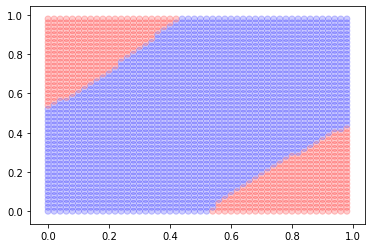

In [26]:
#epochs 2배

model = Sequential()

model.add(Dense(5, input_dim=2))    #입력층
model.add(Activation('sigmoid'))

model.add(Dense(1))                 #출력층 
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X,y,batch_size=4, epochs=6000, verbose=0)
print(model.predict_proba(X))



xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

결정계수면. decision

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_17 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 11        
_________________________________________________________________
activation_18 (Activation)   (None, 1)                 0         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
[[0.06619912]
 [0.8800847 ]
 [0.9052931 ]
 [0.1271393 ]]
(2500, 2)
<class 'numpy.ndarray'>
(2500, 1)


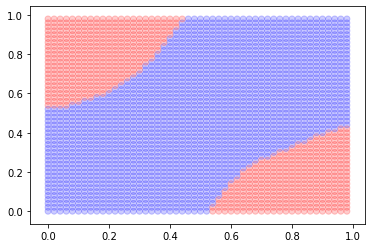

In [27]:
#10층 -> 층 많아지면 boundary 복잡해져

model = Sequential()

model.add(Dense(10, input_dim=2))    #입력층
model.add(Activation('sigmoid'))

model.add(Dense(1))                 #출력층 
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X,y,batch_size=4, epochs=3000, verbose=0)
print(model.predict_proba(X))



xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_19 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_20 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_21 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
__________

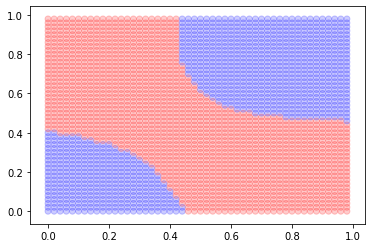

In [28]:
#10층+레이어추가
#parameter 많아짐

model = Sequential()

model.add(Dense(10, input_dim=2))   #처음은 input dim가 꼭 필요
model.add(Activation('sigmoid'))

model.add(Dense(10))                #이전 층의 결과를 input dim로 씀 (sequential)
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))    #층 더 추가

model.add(Dense(1))
model.add(Activation('sigmoid'))    #출력층

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X,y,batch_size=4, epochs=3000, verbose=0)
print(model.predict_proba(X))



xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_23 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 55        
_________________________________________________________________
activation_24 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 30        
_________________________________________________________________
activation_25 (Activation)   (None, 5)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 6         
__________

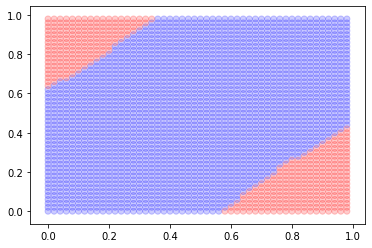

In [29]:
#10층+레이어추가 -> 층 깊어지면 뉴런갯수 적어져도 돼

model = Sequential()

model.add(Dense(10, input_dim=2))   #처음은 input dim가 꼭 필요
model.add(Activation('sigmoid'))

model.add(Dense(5))                #이전 층의 결과를 input dim로 씀 (sequential)
model.add(Activation('sigmoid'))

model.add(Dense(5))
model.add(Activation('sigmoid'))    #층 더 추가

model.add(Dense(1))
model.add(Activation('sigmoid'))    #출력층

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X,y,batch_size=4, epochs=3000, verbose=0)
print(model.predict_proba(X))



xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

* mgrid

In [38]:
xx, yy = np.mgrid[0:1:0.1, 0:1:0.1]
print(xx.shape)
print(xx)
print(yy.shape)
print(yy)
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
print(grid)

(10, 10)
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]
 [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
 [0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9]]
(10, 10)
[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]]
(100, 2)
[[0.  0. ]
 [0.  0.1]
 [0.  0.2]
 [0.  0.3]
 [0.  0.4]
 [0.  0.5]
 [0.  0.6]
 [0.  0.7]
 [0.  0.8]
 [0.  0.9]
 

In [37]:
print(xx.flatten())

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.7 0.7
 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8
 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9]


<class 'numpy.ndarray'>
(100, 1)


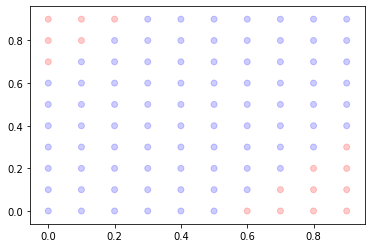

In [39]:
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

<class 'numpy.ndarray'>
(10000, 1)


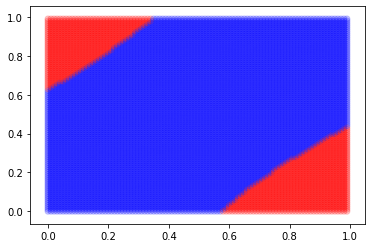

In [40]:
xx, yy = np.mgrid[0:1:0.01, 0:1:0.01]
grid = np.c_[xx.flatten(), yy.flatten()]
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_27 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_28 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_29 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                110       
__________

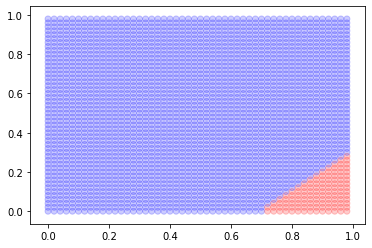

In [41]:
#층을 깊은 network -> 결과가 더 나빠짐.
#전혀 학습이 잘 안 됨. boundary가 nonlinear.

model = Sequential()

model.add(Dense(10, input_dim=2))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X,y,batch_size=4, epochs=3000, verbose=0)
print(model.predict_proba(X))



xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')